In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data= pd.read_csv("C:/Users/Dell/OneDrive/Desktop/competitons/Worksheet in 6796bd2167e3d_HexaMart_Case.csv", encoding= "ISO-8859-1")

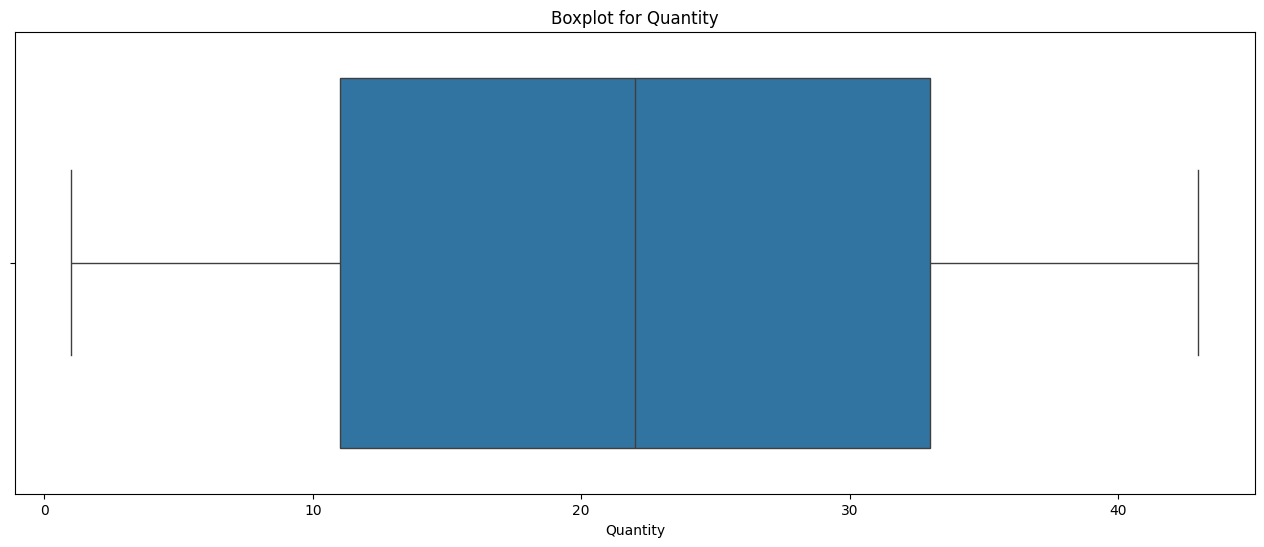

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (16,6))
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot for Quantity')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler() 
numeric_features = ['Quantity', 'Unit Price', 'Total Sales', 'Profit'] 
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [15]:
categorical_cols = ["Region", "Product Line", "Customer Type"]

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data_encoded.head())

   Customer ID  Quantity   Order ID Payment Method Date of Order      City  \
0        40333  1.255522   SCHE-867    Credit Card    29-11-2015   Chennai   
1        18111  1.494868  NDEL-5690    Net Banking    12-11-2016     Delhi   
2        37699 -1.696404  WPAN-3389    Net Banking    08-01-2015    Panaji   
3        36722  0.138577  ERAN-8249    Net Banking    01-01-2017    Ranchi   
4        21943 -0.340114  NDEH-1618    Credit Card    23-04-2018  Dehradun   

   Unit Price  Total Sales    Profit  Region_North India  Region_South India  \
0    1.511982     2.544164  2.290561               False                True   
1    1.034463     2.249903 -1.682246                True               False   
2    1.300678    -1.069803 -0.579419               False               False   
3   -0.203820    -0.055051  0.370911               False               False   
4    0.013045    -0.214540 -0.772169                True               False   

   Region_West India  Product Line_Food and Bevera

In [16]:
bool_cols = data_encoded.select_dtypes(include=['bool']).columns

# Convert only boolean columns to integers (0/1)
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

print(data_encoded.dtypes)

Customer ID                          int64
Quantity                           float64
Order ID                            object
Payment Method                      object
Date of Order                       object
City                                object
Unit Price                         float64
Total Sales                        float64
Profit                             float64
Region_North India                   int32
Region_South India                   int32
Region_West India                    int32
Product Line_Food and Beverages      int32
Product Line_Home Décor              int32
Product Line_Kitchen Appliances      int32
Product Line_Skincare                int32
Product Line_Sports                  int32
Product Line_Technology              int32
Customer Type_Regular                int32
Customer Type_Trial                  int32
dtype: object


In [17]:
x= data_encoded.drop(columns= ["Profit", "Customer ID", "Quantity", "Order ID", "Payment Method", "Date of Order", "City", "Unit Price", "Total Sales"])
y= data_encoded['Quantity']

In [18]:
print(y.dtype)

float64


In [19]:
print(x.head())

   Region_North India  Region_South India  Region_West India  \
0                   0                   1                  0   
1                   1                   0                  0   
2                   0                   0                  1   
3                   0                   0                  0   
4                   1                   0                  0   

   Product Line_Food and Beverages  Product Line_Home Décor  \
0                                0                        1   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   Product Line_Kitchen Appliances  Product Line_Skincare  \
0                                0                      0   
1                                0                      0   
2                                1                   

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [21]:
print(x_train.dtypes)

Region_North India                 int32
Region_South India                 int32
Region_West India                  int32
Product Line_Food and Beverages    int32
Product Line_Home Décor            int32
Product Line_Kitchen Appliances    int32
Product Line_Skincare              int32
Product Line_Sports                int32
Product Line_Technology            int32
Customer Type_Regular              int32
Customer Type_Trial                int32
dtype: object


In [22]:
print(x.shape, x_train.shape, x_test.shape)

(3908, 11) (3126, 11) (782, 11)


In [23]:
print(y.shape, y_train.shape, y_test.shape)

(3908,) (3126,) (782,)


In [24]:
model= RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
x_train_pred= model.predict(x_train)
print(x_train_pred)

[-0.18291006 -0.12522475  0.13511323 ... -0.02096849  0.10518493
  0.03698168]


In [26]:
mse= mean_squared_error(x_train_pred, y_train)
print(mse)

0.9774603198041502


In [27]:
x_test_pred= model.predict(x_test)
print(x_test_pred)

[ 0.02338007 -0.00401162 -0.07008701  0.20416735  0.06144146  0.05247639
 -0.14259667  0.02211524  0.14194631  0.02211524 -0.20549254  0.00263567
  0.27501809  0.27117035 -0.35040033 -0.03072873 -0.13725512  0.14194631
 -0.13725512  0.20599941 -0.08101454  0.09607972 -0.0856504  -0.10067174
  0.15987     0.10518493  0.20599941  0.03698168 -0.14414254  0.06144146
  0.27501809 -0.0856504  -0.01134     0.15987     0.10518493  0.19057214
  0.09607972  0.04625394 -0.12522475 -0.13725512  0.14666582  0.15987
 -0.14259667 -0.32892168  0.14358816  0.32932939 -0.00847056 -0.02764638
  0.05997233 -0.12522475  0.27501809 -0.02764638  0.00263567 -0.35040033
  0.18109457 -0.04537555  0.02211524  0.02338007 -0.12522475  0.02004728
 -0.0671822   0.02004728  0.21055632 -0.18291006  0.01412359 -0.14414254
  0.17886975  0.10518493 -0.0856504   0.01412359 -0.1466343   0.02004728
  0.00263567 -0.04758629 -0.27099818 -0.04758629 -0.00847056 -0.00401162
 -0.20549254  0.06144146  0.03698168 -0.01134    -0.27

In [28]:
mse2= mean_squared_error(x_test_pred, y_test)
print(mse2)

1.009138177930392


In [29]:
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


                            Feature  Importance
9             Customer Type_Regular    0.141867
10              Customer Type_Trial    0.117973
1                Region_South India    0.115817
0                Region_North India    0.108315
2                 Region_West India    0.105171
5   Product Line_Kitchen Appliances    0.071865
8           Product Line_Technology    0.071841
6             Product Line_Skincare    0.069857
3   Product Line_Food and Beverages    0.069384
4           Product Line_Home Décor    0.066885
7               Product Line_Sports    0.061025


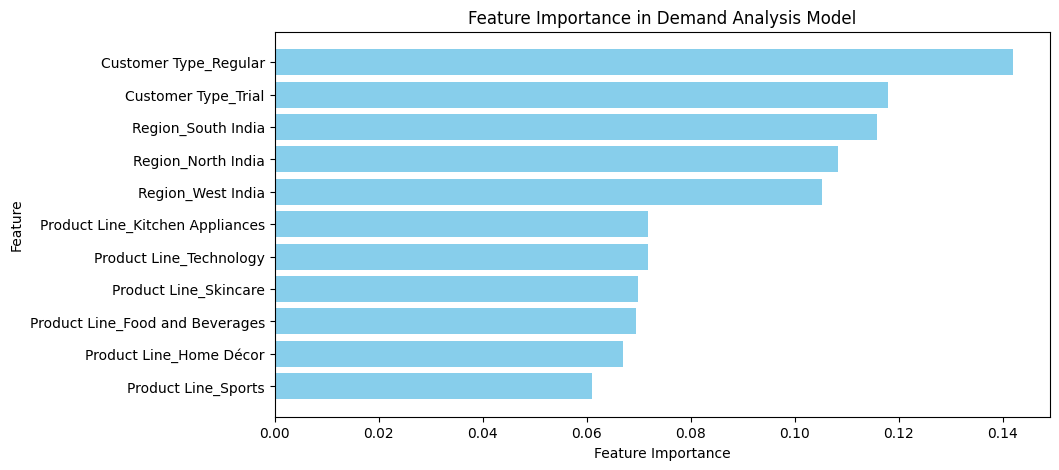

In [30]:

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Demand Analysis Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()
